# **Semanas 12: Aprendizado Supervisionado III**
## **Atividade Semanal**

> Esta é atividade semanal sugerida. Você deverá preenchê-la e enviá-la dentro do prazo (até o fechamento da semana corrente).

In [100]:
# NAO ALTERE OS COMANDOS ABAIXO
import gdown
import pandas as pd

url = 'https://drive.google.com/uc?id=16_bYjOQSwql7cMWCqBB30ZG9XVtbRd11'
output = 'ataque_cardiaco.csv'
gdown.download(url, output, quiet=True)

ataque_cardiaco = pd.read_csv('/content/ataque_cardiaco.csv')

In [101]:
display(ataque_cardiaco)

,idade,sexo,impulso,pressao_alta,pressao_baixa,glicose,kcm,troponina,ataque_cardiaco
0,64,1,66,160,83,160.0,1.80,0.012,N
1,21,1,94,98,46,296.0,6.75,1.060,S
2,55,1,64,160,77,270.0,1.99,0.003,N
3,64,1,70,120,55,270.0,13.87,0.122,S
4,55,1,64,112,65,300.0,1.08,0.003,N
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,N
1315,66,1,84,125,55,149.0,1.33,0.172,S
1316,45,1,85,168,104,96.0,1.24,4.250,S
1317,54,1,58,117,68,443.0,5.80,0.359,S


> O ataque cardíaco, também conhecido como infarto agudo do miocárdio, é uma das principais causas de morte no mundo. Ele ocorre quando o fluxo sanguíneo para uma parte do coração é bloqueado, geralmente por um coágulo. Esse bloqueio pode causar danos permanentes ao músculo cardíaco, e em muitos casos, levar à morte se não houver atendimento rápido.
>
> Diversos fatores aumentam o risco de ataque cardíaco, como idade avançada, pressão arterial elevada, glicose alta (diabetes), níveis anormais de colesterol, obesidade, sedentarismo e até fatores genéticos. Mas o verdadeiro desafio é que muitos pacientes não apresentam sintomas prévios ou não sabem interpretar os sinais de risco iminente.
>
> Pensando nisso, um grupo de pesquisadores decidiu desenvolver um sistema preventivo baseado em dados clínicos rotineiros de pacientes. Com o uso de técnicas de aprendizado de máquina, o objetivo é prever a chance de um ataque cardíaco com base em medidas simples que já fazem parte dos exames médicos de rotina.

> Seu desafio é construir um modelo de classificação que estime a probabilidade de um paciente sofrer um ataque cardíaco, com base em seus dados clínicos.

###Questão 1

Verifique se há registros duplicados, ausentes ou discrepantes na base. Caso positivo, remova-os.

In [102]:
# Questao 1
ataque_cardiaco.duplicated().any() #não há duplicatas


np.False_

In [103]:
ataque_cardiaco.isna().sum() #também não há valores vazios

,0
idade,0
sexo,0
impulso,0
pressao_alta,0
pressao_baixa,0
glicose,0
kcm,0
troponina,0
ataque_cardiaco,0


In [104]:
ataque_cardiaco.describe()
#O unico problema e a variavél sexo

,idade,sexo,impulso,pressao_alta,pressao_baixa,glicose,kcm,troponina
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [105]:
ataque_cardiaco['sexo'] = ataque_cardiaco['sexo'].map({1: 'Masculino', 0: 'Feminino'})

###Questão 2

Após a base limpa e organizada, realize o pré-processamento para a aplicação do modelo de Regressão Logística.

In [106]:
# Questao 2
# Separando lista com os nomes
alvo="ataque_cardiaco"
atributos=["idade","sexo","impulso","pressao_alta","pressao_baixa","glicose","kcm","troponina","ataque_cardiaco"]
# Criando bases separadas
y = ataque_cardiaco[alvo].to_frame()
X = ataque_cardiaco[atributos]
# Separando os atributos em 2 classes
atrib_num=["idade","impulso","pressao_alta","pressao_baixa","glicose","kcm","troponina"]
atrib_cat=["sexo"] #não há atributos categóricos
# Criando bases separadas
y = ataque_cardiaco[alvo].to_frame().values.ravel()
X = ataque_cardiaco[atributos]
# Criando bases separadas
X_num = X[atrib_num] # X somente com vars numericas
X_cat = X[atrib_cat] # X somente com vars categoricas

In [107]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

# Pipeline para atributos numéricos
num_pipe = Pipeline([
    ('padronizacao', StandardScaler()),
    ('transformacao', PowerTransformer()),
    ('componentes', PCA())
])

# Transformacao para os atributos
atributos_transf = ColumnTransformer([
    # Transformacoes - Atributos numericos
    ('Atributos numericos', num_pipe, atrib_num),
    # Transformacoes - Atributos categoricos
    ('Atributos categoricos', OneHotEncoder(dtype='int', drop='first', handle_unknown='ignore'), atrib_cat)],
    remainder='drop',
    verbose_feature_names_out=False
)

# Aplicando a transformacao nos atributos
atributos_transf.fit(X)

ColumnTransformer(transformers=[('Atributos numericos',
                                 Pipeline(steps=[('padronizacao',
                                                  StandardScaler()),
                                                 ('transformacao',
                                                  PowerTransformer()),
                                                 ('componentes', PCA())]),
                                 ['idade', 'impulso', 'pressao_alta',
                                  'pressao_baixa', 'glicose', 'kcm',
                                  'troponina']),
                                ('Atributos categoricos',
                                 OneHotEncoder(drop='first', dtype='int',
                                               handle_unknown='ignore'),
                                 ['sexo'])],
                  verbose_feature_names_out=False)

In [108]:
from sklearn.linear_model import LogisticRegression

# Sequenciando as transformacoes necessarias
# para um alvo categórico
alvo_cat_rl = Pipeline(steps=[
   ('Logistica', LogisticRegression())
   ])

# Pipeline
pipe_cat_rl = Pipeline(steps=[
   ('atributos', atributos_transf),
   ('alvo', alvo_cat_rl)])

In [109]:
# Ativando o modelo
pipe_cat_rl.fit(X, y)

Pipeline(steps=[('atributos',
                 ColumnTransformer(transformers=[('Atributos numericos',
                                                  Pipeline(steps=[('padronizacao',
                                                                   StandardScaler()),
                                                                  ('transformacao',
                                                                   PowerTransformer()),
                                                                  ('componentes',
                                                                   PCA())]),
                                                  ['idade', 'impulso',
                                                   'pressao_alta',
                                                   'pressao_baixa', 'glicose',
                                                   'kcm', 'troponina']),
                                                 ('Atributos categoricos',
                                                  OneHotEncoder(drop='first',
                                                                dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['sexo'])],
                                   verbose_feature_names_out=False)),
                ('alvo',
                 Pipeline(steps=[('Logistica', LogisticRegression())]))])

###Questão 3

Treine o modelo de regressão logística utilizando esses dados. Compare visualmente suas previsões.

In [110]:
# Questao 3
# Previsao utilizando o modelo 'Regressão logística'
y_prev_rl = pipe_cat_rl.predict(X)

In [111]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Tabela de Contingência
tc_rl = pd.crosstab(y, y_prev_rl, rownames=['Observado'], colnames=['Previsto'])
display(tc_rl)

Previsto,N,S
Observado,,
N,476,33
S,88,722


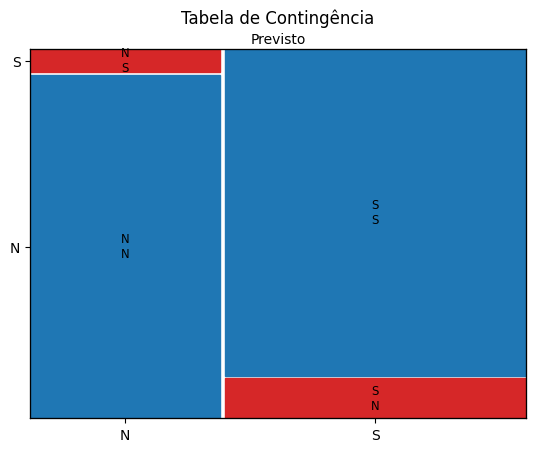

In [112]:
# Transformando `tc` para um dicionário
dados_tc_rl = {(str(row), str(col)): tc_rl.loc[row, col] for row in tc_rl.index for col in tc_rl.columns}
props = lambda key: {'color': 'tab:blue' if key[0] == key[1] else 'tab:red'}

# Mosaic plot
mosaic(dados_tc_rl, title='Tabela de Contingência', properties=props, gap=0.01)
plt.xlabel('Previsto')
plt.ylabel('Observado')
plt.show()

###Questão 4

Uma paciente do sexo feminino com 65 anos de idade vem sendo monitorada constantemente por aparelhos. As medições ocorrem a cada 30 minutos. Na última medição, o cenário foi o seguinte:
*   Seu impulso subiu de 75 para 80
*   Sua pressão (alta) subiu de 124 para 180
*   Sua pressão (baixa) subiu de 72 para 120
*   Sua glicose manteve-se estável em 90
*   Seu kcm subiu de 2.85 para 3
*   Sua troponina subiu de 0.01 para 0.02

> A equipe médica, bastante sobrecarregada, deve ficar de sobre alerta com essa paciente ou a situação permanece sobre controle com relação à sua saúde? Em outras palavras, a probabilidade de ataque cardíaco aumentou significativamente na última medição?

In [113]:
# Questao 4
X_novo = pd.DataFrame ({
  "sexo":	['Feminino','Feminino'],
  "idade":[65,65],
  "impulso":[75,80],
  "pressao_alta":[124,180],
  "pressao_baixa":[72,120],
  "glicose":[90,90],
  "kcm":[2.85,3],
  "troponina":[0.01,0.02]
})

# Previsao utilizando o modelo 'Regressão logística'
y_prev_rl_novo = pipe_cat_rl.predict(X_novo)

for i, valor in enumerate(y_prev_rl_novo.flatten(), 1):
    if(valor=='N'):
      status_valor="Baixa"
    else:
      status_valor="Alta"
    print(f"Previsão de ataque na {i}° medição:{status_valor}")


Previsão de ataque na 1° medição:Baixa
Previsão de ataque na 2° medição:Alta


Respota: **A chance de ataque cardíaco aumentou logo a equipe médica deve ficar em alerta com a paciente**